In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

train_path = "./train.csv"
test_path = "./test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [3]:
print(train_df.head())

                            md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  fd06d13de341cc75ad679916c5d7e6a6                  4                    4   
1  a4bb4e5206c4e89a303f470576fc5253                  1                    1   
2  c94ce27e389f96bda998e7c3fa5c4a2e                  5                    5   
3  ebcf2b50dd943c700d4e2b586fcd4425                  3                    3   
4  c77d6c895f05fea73a8f3704307036c0                  1                    1   

                              label nine_partition_label  \
0                 prurigo-nodularis     benign-epidermal   
1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                            keloid         inflammatory   
3              basal-cell-carcinoma  malignant-epidermal   
4                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  
0                benign           NaN         34  
1             malignant           NaN         12  
2        no

In [4]:
print("Missing values in Train Data:\n", train_df.isnull().sum())
print("Missing values in Test Data:\n", test_df.isnull().sum())

Missing values in Train Data:
 md5hash                     0
fitzpatrick_scale           0
fitzpatrick_centaur         0
label                       0
nine_partition_label        0
three_partition_label       0
qc                       2770
ddi_scale                   0
dtype: int64
Missing values in Test Data:
 md5hash                   0
fitzpatrick_scale         0
fitzpatrick_centaur       0
qc                     1198
ddi_scale                 0
dtype: int64


In [5]:
train_df.drop(columns=["qc"], inplace=True)
print("Dropped QC column due to excessive missing values.")

Dropped QC column due to excessive missing values.


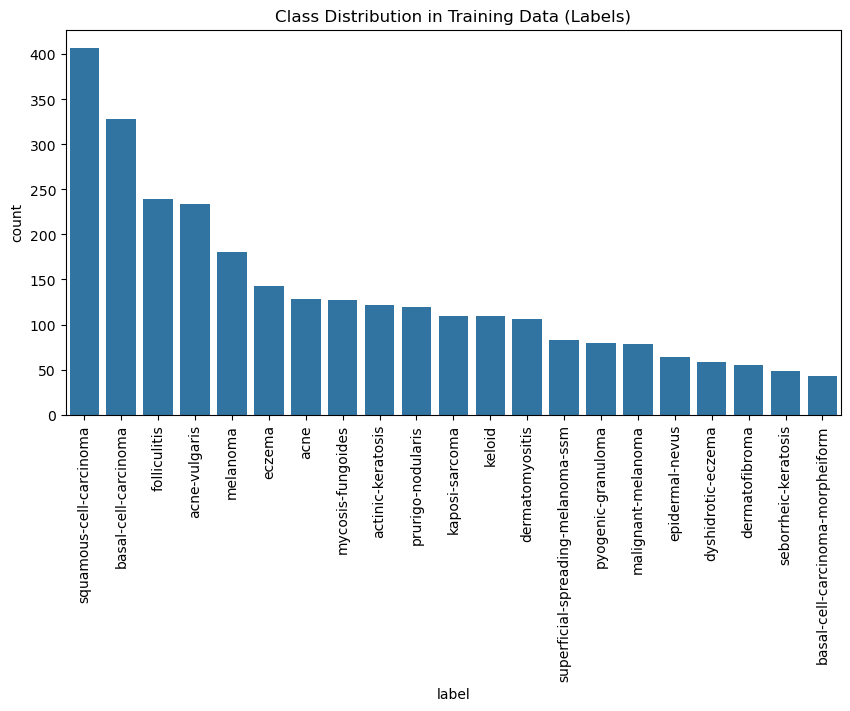

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x="label", order=train_df["label"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Data (Labels)")
plt.show()

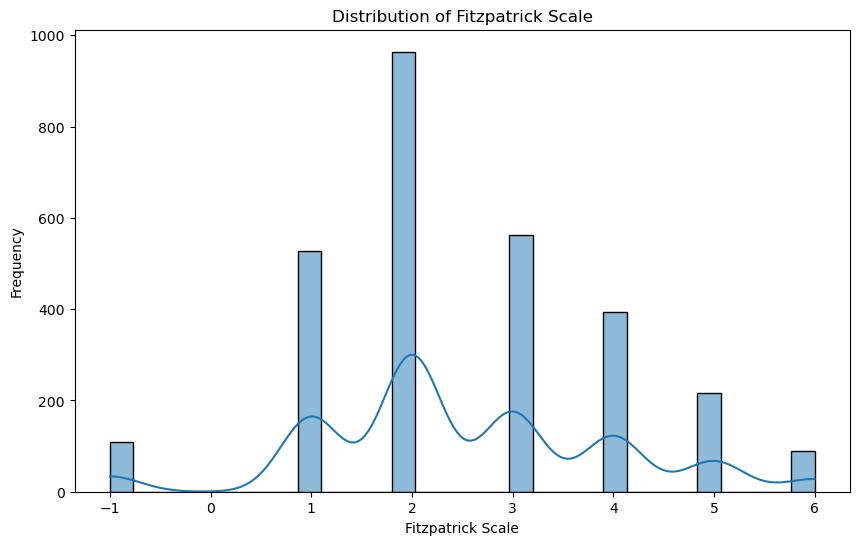

In [7]:
# Visualize the distribution of numerical features (e.g., fitzpatrick_scale)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['fitzpatrick_scale'], kde=True, bins=30)
plt.title('Distribution of Fitzpatrick Scale')
plt.xlabel('Fitzpatrick Scale')
plt.ylabel('Frequency')
plt.show()


In [12]:
# For Kaggle - because of large image directory

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [13]:
def img_reshape(img):
    img = Image.open('/kaggle/input/bttai-ajl-2025/train/train/keloid/'+img) # .convert('RGB')
    img = img.resize((300,300))
    # img = np.asarray(img)
    return img

In [ ]:
pil_im = img_reshape('c94ce27e389f96bda998e7c3fa5c4a2e.jpg')
plt.imshow(pil_im)

In [ ]:
rows=4
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(keloid_arr):
            axes[i, j].imshow(keloid_arr[img_count])
            img_count+=1
